In [156]:
#loading in cases by state/county covid data
library('tidyr')
library('ggplot2')
suppressMessages(library('dplyr'))
cases <- read.csv("../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv",check.names=F)

casesonly <- select(cases, 7, 12:dim(cases)[2])
summedcases <- casesonly %>% group_by(Province_State) %>% summarise_all(sum)

In [157]:
stateBar <- function(state) {
    temp <- filter(summedcases, Province_State == state)
    temp <- temp[1,-1] %>% gather('day', 'cases')
    temp$day <- as.Date(temp$day, "%m/%d/%Y")
    temp <- mutate(temp, NewCases = 0L)
    for(i in 1:dim(temp)[1]) {
        if (i > 1) {
            temp[i,3] <- temp[i,2]-temp[i-1,2]
            } 
        }
    ggplot(data=temp,aes(x=day, y=NewCases)) +
    geom_bar(stat="identity",fill='black',colour='black') 
}

In [177]:
stateLine <- function(state) {
    temp <- filter(summedcases, Province_State == state)
    temp <- temp[1,-1] %>% gather('day', 'cases')
    temp$day <- as.Date(temp$day, "%m/%d/%Y")
    temp <- mutate(temp, NewCases = 0L)
    
    for(i in 1:dim(temp)[1]) {
        if (i > 1) {
            temp[i,3] <- temp[i,2]-temp[i-1,2]
            } 
        }
    temp <- mutate(temp, threeDay = 0L)
    
    for(i in 1:dim(temp)[1]) {
        if (i > 3) {
            temp[i,4] <- (temp[i,3]+temp[i-1,3]+temp[i-2,3])/3
            } 
        }
    ggplot(data=temp, aes(x=day, y=threeDay))+
    geom_smooth(size = 1.5, color="red", span = .2, method = 'loess') 
}

In [178]:
stateBoth <- function(state) {
    temp <- filter(summedcases, Province_State == state)
    temp <- temp[1,-1] %>% gather('day', 'cases')
    temp$day <- as.Date(temp$day, "%m/%d/%Y")
    temp <- mutate(temp, NewCases = 0L)
    
    for(i in 1:dim(temp)[1]) {
        if (i > 1) {
            temp[i,3] <- temp[i,2]-temp[i-1,2]
            } 
        }
    temp <- mutate(temp, threeDay = 0L)
    
    for(i in 1:dim(temp)[1]) {
        if (i > 3) {
            temp[i,4] <- (temp[i,3]+temp[i-1,3]+temp[i-2,3])/3
            } 
        }
    ggplot(temp, aes(x = day)) + 
    geom_col(aes(y = NewCases), size = 1, color = "black", fill = "black") +
    geom_smooth(aes(y = threeDay), size = 1.5, color="red", span = .2, method = 'loess') 
}

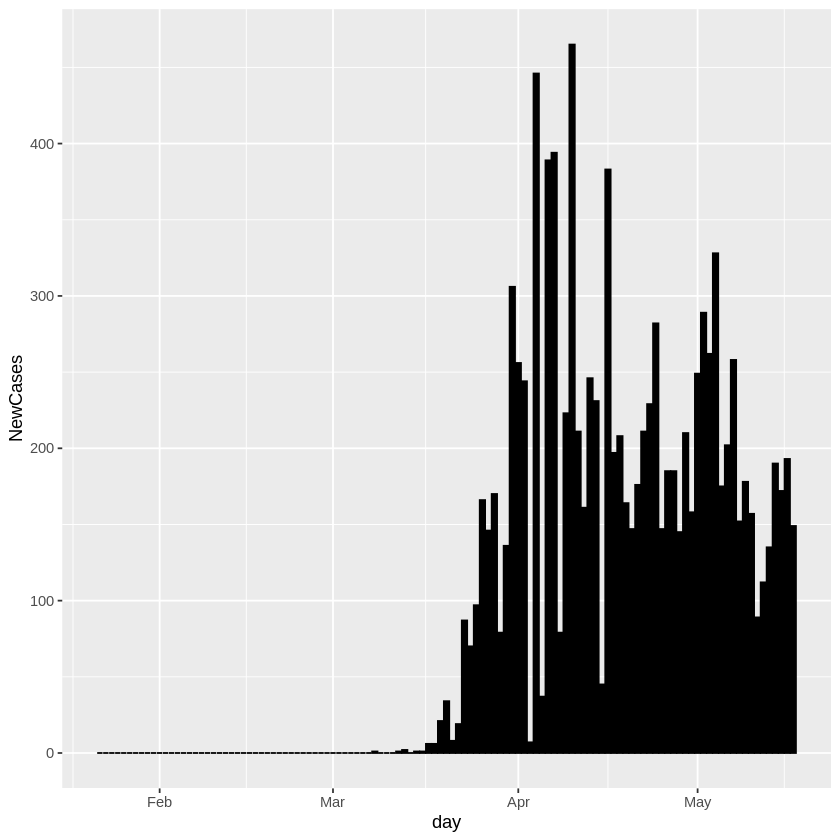

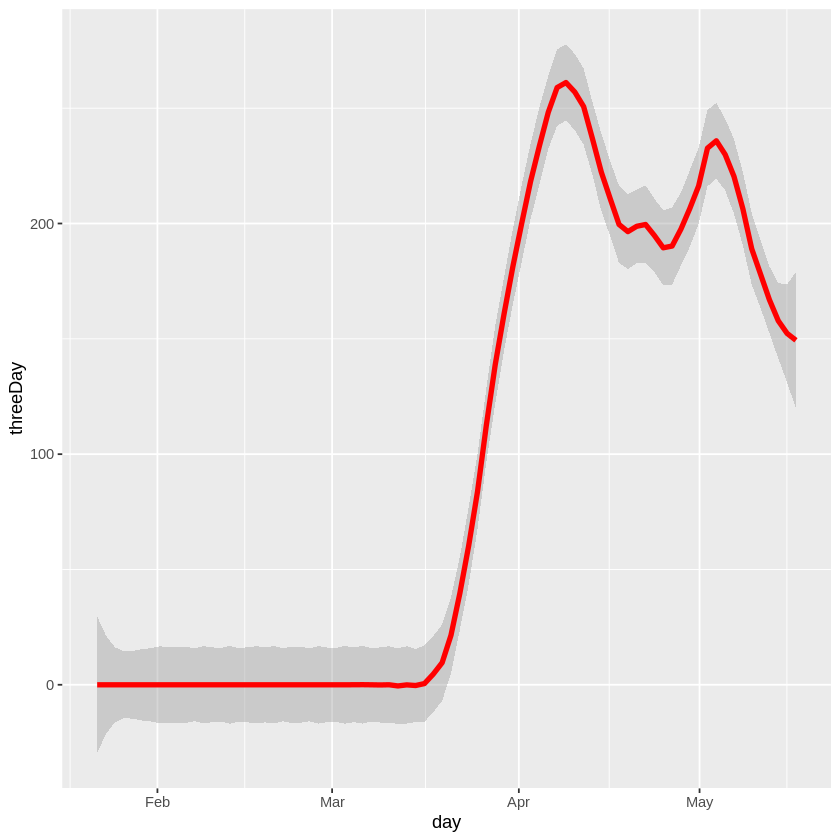

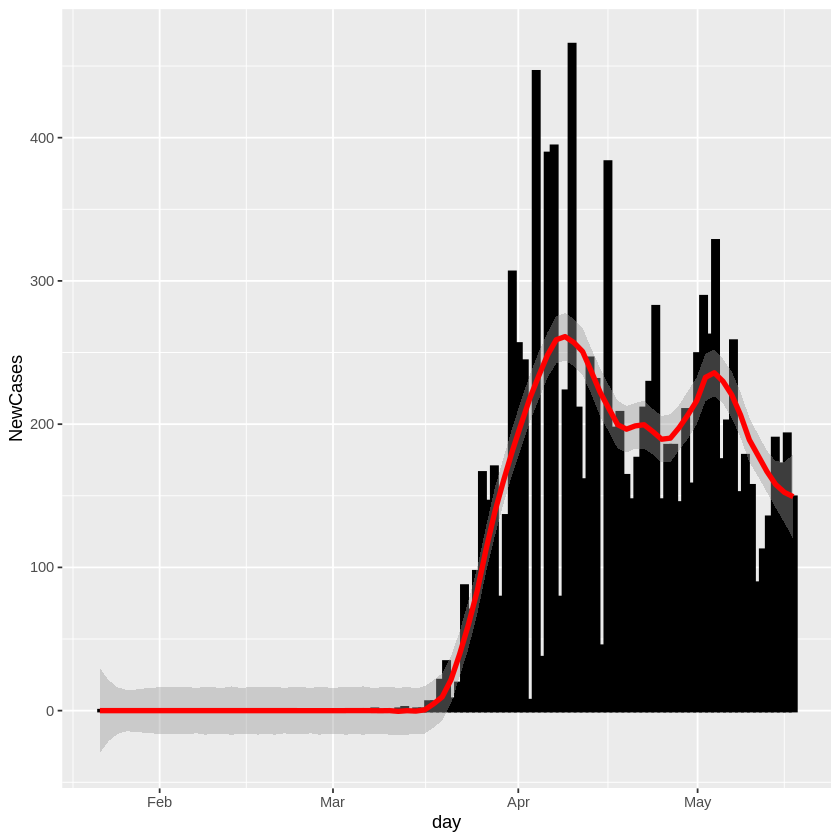

In [179]:
stateBar('Missouri')
stateLine('Missouri')
stateBoth('Missouri')